# ANALISIS EXPLORATORIO DE DATOS EN UNA BASE DE DATOS 

A continuación, se procederá a realizar un análisis expliratorio de datos para poder obtener conclusiones de los datos obtenidos.
La base de datos empleada corresponde a Energy Efficiency Dataset de kaggle: https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset, asimismo, se realizarán gráficas para poder observar caracteríticas de los datos

Información del dataset: 
Attribute Information:

The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

X1 Compacidad relativa

X2 Área de superficie

X3 Área de pared

X4 Área de techo

X5 Altura total

X6 Orientación

X7 Área de acristalamiento

X8 Distribución del área de acristalamiento

y1 Carga de calefacción

y2 Carga de refrigeración



Queremos predecir o la carga de calefacción o la carga de refrigeración

# Pregunta a responder: ¿Cuáles son los datos que presentan mayor correlación con las salidas y1 y y2? 

In [2]:
# importamos las librerías necesarias
import pandas as pd
import numpy as np

In [3]:
data_path = "../data/data.csv"

In [5]:
df = pd.read_csv(data_path) # importamos el dataset

In [6]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
# renombramos las columnas con la función rename
df = df.rename(columns={"X1":"Compacidad relativa",
                   "X2": "Área de superficie",
                   "X3": "Área de pared",
                   "X4": "Área de techo",
                   "X5": "Altura total",
                   "X6": "Orientación",
                   "X7": "Área de acristalamiento",
                   "X8": "Distribución del área de acristalamiento",
                   "Y1": "Carga de calefacción",
                   "Y2": "Carga de refrigeración"})

In [8]:
df.head()

,Compacidad relativa,Área de superficie,Área de pared,Área de techo,Altura total,Orientación,Área de acristalamiento,Distribución del área de acristalamiento,Carga de calefacción,Carga de refrigeración
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
df.dtypes  #verificamos los tipos de datos con los cuales estamos trabajando

Compacidad relativa                         float64
Área de superficie                          float64
Área de pared                               float64
Área de techo                               float64
Altura total                                float64
Orientación                                   int64
Área de acristalamiento                     float64
Distribución del área de acristalamiento      int64
Carga de calefacción                        float64
Carga de refrigeración                      float64
dtype: object

**Se visualiza que La orientación y la distribución de área de acristalamiento son datos enteros. Orientación es de 2 a 5 y Distribución del área de acristalamiento es de 0 a 5**

In [10]:
df.describe()

,Compacidad relativa,Área de superficie,Área de pared,Área de techo,Altura total,Orientación,Área de acristalamiento,Distribución del área de acristalamiento,Carga de calefacción,Carga de refrigeración
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [11]:
df.count() # contabilizamos la cantidad de datos que tenemos disponibles

Compacidad relativa                         768
Área de superficie                          768
Área de pared                               768
Área de techo                               768
Altura total                                768
Orientación                                 768
Área de acristalamiento                     768
Distribución del área de acristalamiento    768
Carga de calefacción                        768
Carga de refrigeración                      768
dtype: int64

In [12]:
df.isna().sum()  # contabilizamos la cantidad de datos nulos presentes en el dataset

Compacidad relativa                         0
Área de superficie                          0
Área de pared                               0
Área de techo                               0
Altura total                                0
Orientación                                 0
Área de acristalamiento                     0
Distribución del área de acristalamiento    0
Carga de calefacción                        0
Carga de refrigeración                      0
dtype: int64

In [13]:
df.duplicated().sum() # validamos la presencia de duplicados

np.int64(0)

# ANÁLISIS DESCRIPTIVO DE LA BASE DE DATOS

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 

Visualizaremos el histograma de cada dato para analizar la distribución de los mismos

# Distribución de acristalamiento

<Axes: xlabel='Distribución del área de acristalamiento', ylabel='Count'>

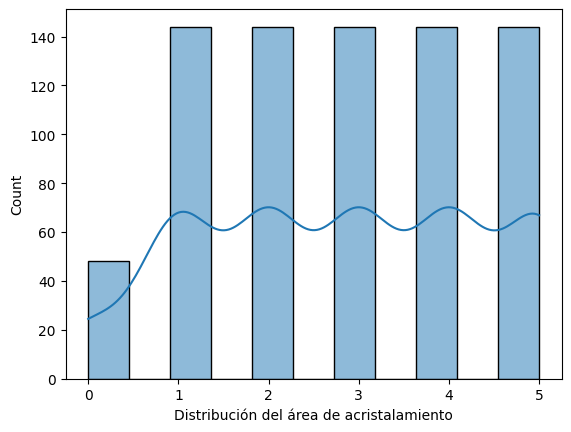

In [15]:
# contabilizamos la frecuencia de cada valor presente en la columna
sns.histplot(df, x= "Distribución del área de acristalamiento", kde = True)

- La información de área de acristalamiento se divide en categorías representadas con números del cero al cinco.
- Las categorías desde el uno al cinco poseen la misma cantidad de datos, y la categoría cero muestra ser la menor de todas con una cantidad de cincuenta datos, siendo la menos representada.
- ¿Esta división se debe a que se encuentran a diferentes alturas los departamwentos o al tipo de departamento?
- Los datos de la distribución del área de acristalamiento tiene un sesgo a la derecha.


# Orientación

<Axes: xlabel='Orientación', ylabel='Count'>

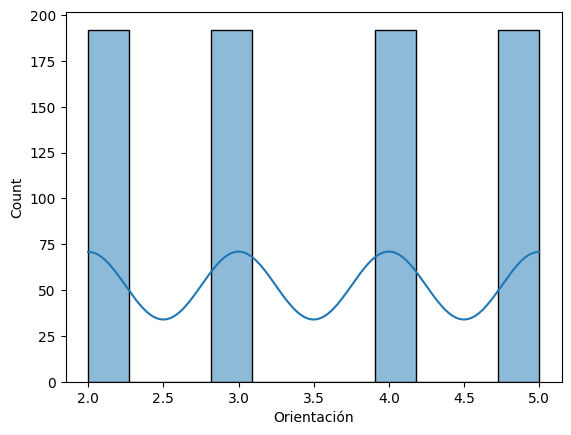

In [16]:
sns.histplot(x = "Orientación", data = df, kde = True)

- Los edificios se dividen en cuatro clases de orientación, teniendo estas clases la misma cantidad de datos.
- ¿Las clases de orientación hace referencia a si está mirando a los puntos cardinales o a cierto grado de rotación sobre su eje?
- Los datos no presentan una distribución normal, en lugar de eso tiene una distribución constante en clases discretas.

# Compacidad relativa

<Axes: xlabel='Compacidad relativa', ylabel='Count'>

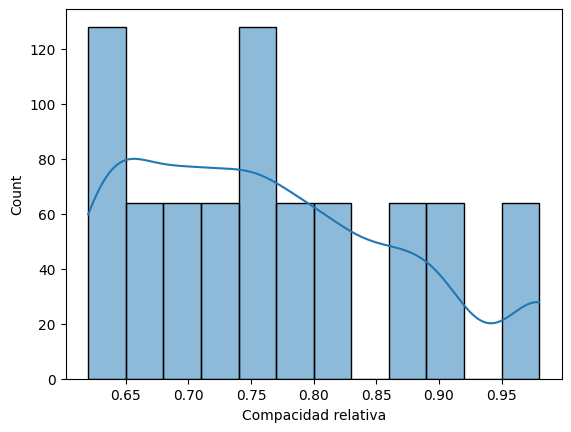

In [17]:
sns.histplot(data = df, x = "Compacidad relativa", kde = True)

- la compacidad relativa mide la densidad relativa e indica el grado de compactación de un suelo granular
- Se evidencia que los edificios con compacidad relativa de 0.65 y 0.75 son los predominantes
- Asimismo, el resto de edificios se divide en cantidades similares entre las densidades que se encuentran dentro del siguiente rango [0.6, 0.95], a excepción de la densidad con valor 0.85
- Los datos de compacidad relativa tienen un ligero sesgo a la izquierda, es decir, se tiene una mayor cantidad de datos con compacidades relativa pequeñas presentes en los edificios. Esto es un indicador que se tiene una mayor cantidad de edificios construidos sobre suelos más "sueltos" o granulares, por ejemplo, arena o grava, siendo esta una situación a tomar en cuenta a nivel estructural y de defensa civil puesto que estos suelos no tienen la capacidad de dar soporte adecuado a la estructura frente a siniestros como los sismos poniendo en riesgo la vida de las personas que habitan o se encuentran dentro de las construcciones. 

# Área de superficie

<Axes: xlabel='Área de superficie', ylabel='Count'>

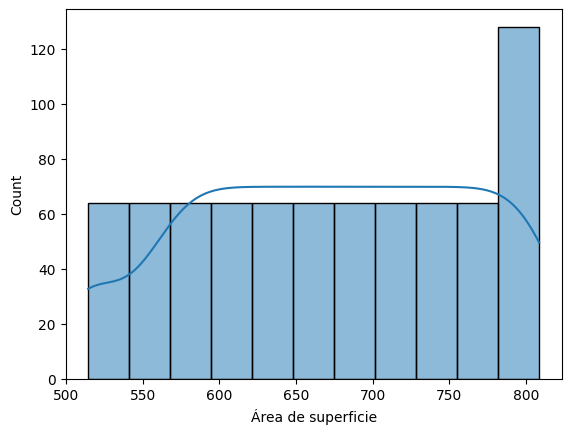

In [35]:
sns.histplot(x= "Área de superficie", data = df, kde = True)

- Se visualiza una mayor cantidad de área de superficie con un valor de 800 u^2, lo cual genera un ligero sesgo a la derecha. 
- El resto de cantidades de edificios se dividen en cantidades iguales en los valores dentro del rango [500,800]
- La distribución es unimodal, lo cual concierta con el pico de 800 u^2.

# Área de pared

<Axes: xlabel='Área de pared', ylabel='Count'>

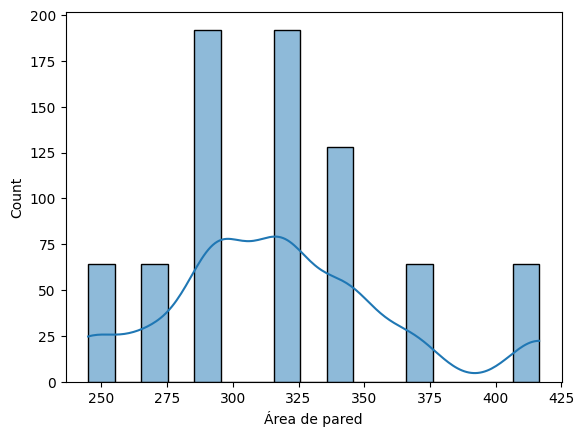

In [19]:
sns.histplot(x= "Área de pared", data = df, kde = True)

- El área de pared tiene una distribución centrada al medio con un ligero sesgo a la izquierda, indicando que el área de pared dominante se hubica en 285 y 325 aproximadamente. Esto indicaría que con un área de pared de esas dimensiones, la transferencia de calor del ambiente al interior del edificio podría ser de una forma intermedia, asimismo, la cantidad de recintos con el área de pared entre 400 y 425 u^2 es de aproximadamente 60, lo cual indicaría que el impacto en el gasto de calefacción podría no aumentar mucho debido a estos recintos.
- Al tener una distribución bimodal, no aplica con una distribución normal.

# Área de techo

<Axes: xlabel='Área de techo', ylabel='Count'>

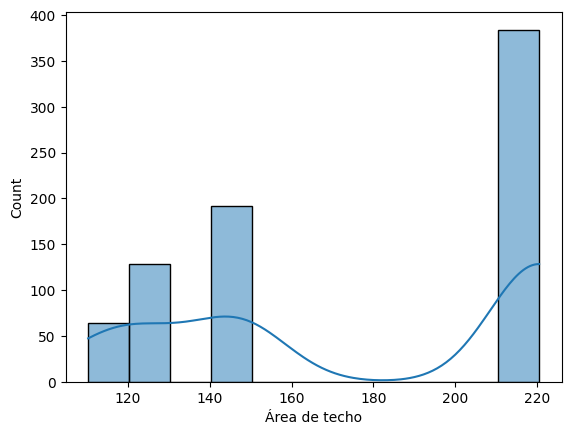

In [20]:
sns.histplot(x= "Área de techo", data = df, kde = True)

- El área del techo presenta una distribución sesgada a la derecha, indicando que la cantidad de recintos con un área de techo de 220 es mayor que los recintos que tienen una cantidad de 50 a 150 u^2.
- Una mayor área de techo indicaría una mayor área de contacto con el exterior, aumentado la conductivida con el exterior y por lo mismo, posiblemente, aumentando los gastos por calefacción.

# Altura total

<Axes: xlabel='Altura total', ylabel='Count'>

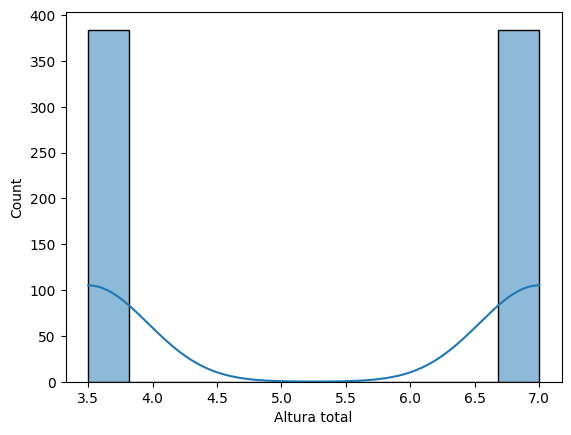

In [21]:
sns.histplot(x= "Altura total", data = df, kde = True)

- La distribución de altura se centra en dos tipos, alturas de 3.5 y 7, lo cual indicaría en que probablemente se estén refiriendo a construcciones de 1 piso a más.
- Las construcciones de mayor altura, concentran interiormente mayor volumen de aire, lo cual conlleva mayor trabajo en aumentar la temperatura, aumentando los costos de calefaccion.

# ANÁLISIS BIVARIADO Y MULTIVARIADO

Debido a que como hemos visto anteriormente, los datos no tienen distribución normal, por ende, no es recomendable emplear la matriz de correlación de pearson. En este caso, emplearemos la matriz de correlacion de Spearman.

In [23]:
matriz_correlacion = df.corr(method="spearman")

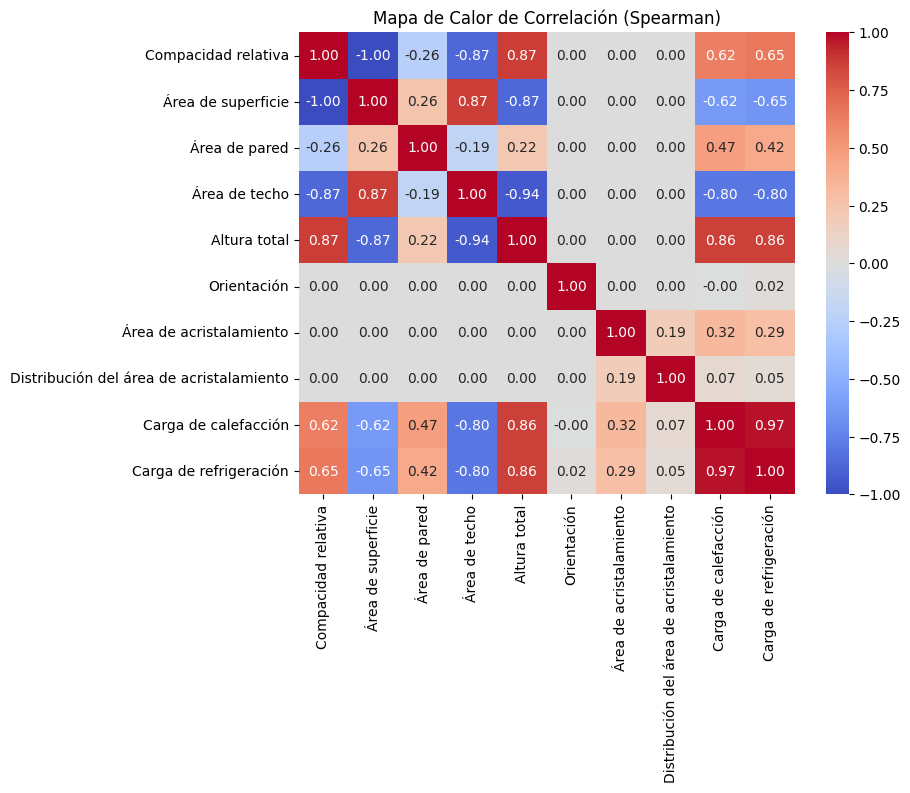

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(
    matriz_correlacion, 
    annot=True, # Muestra los valores de correlación en las celdas
    cmap = "coolwarm", # Elige un mapa de color (coolwarm es ideal para correlaciones)
    fmt=".2f"        # Formatea los números a dos decimales
)
plt.title('Mapa de Calor de Correlación (Spearman)')
plt.show()

Según el mapa de calor, para las salidas Carga de calefacción y Carga de refrigeración, los datos presentan la siguiente correlación: 
* Orientación y Distribución del área de acristalamiento: no presentan correlación
* Compacidad relativa y área de pared, área de acristalamiento: correlación positiva leve
* Area de superficie y área de techo: correlación negativa leve
* **Area de techo** : correlación negativa fuerte
* **Altura total**: correlación positiva fuerte

# RESULTADOS Y CONCLUSIONES

**Se empleó la matriz de correlación de Spearman debido a que los datos no tienen una distribución normal.**
**Se verifica que los parámetros que tienen un mayor peso en la carga de calefacción y refrigeración, son el área del techo y la altura total. Esto es respaldado por la ecuación de conductividad, que indica que el área entre las zonas fría y caliente es directamente proporcional a la conductividad térmica, y a más conductivo, mayor es el trabajo por mantener la temperatura, por ende, mayor es el gasto.**
**Los demás parámetros tienen un leve o nulo impacto en la carga de calefacción y refrigeración. En caso se desee entrenar un modelo predictivo debemos quedarnos con los que tienen un leve y gran impacto en la variable objetivo.**
**Asimismo, en los datos, la compacidad relativa y área de superficie son datos que tienene el mismo impacto en relaciones opuestas, por ende, para evitar una colinealidad de los datos, solo nos debemos quedar con uno de ellos.**

# Trabajos Futuros

Se recomienda trabajar más los datos y realizar una ingeniería de características en caso se busque entrenar modelos predictivos como RandomForest o redes neuronales, ya que es posible encontrar parámetros derivados de los iniciales que permitan explicar mejor el comportamiento de las variables objetivos.